<a href="https://colab.research.google.com/github/seys-fing/scripts/blob/master/seys_07_DTFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#Señales y Sistemas, 2019. IIE-FIng-Udelar.
#@author: Juan Bazerque

# Importar funciones necesarias
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import warnings

plt.rcParams["figure.figsize"] = (10, 5)

warnings.filterwarnings('ignore')

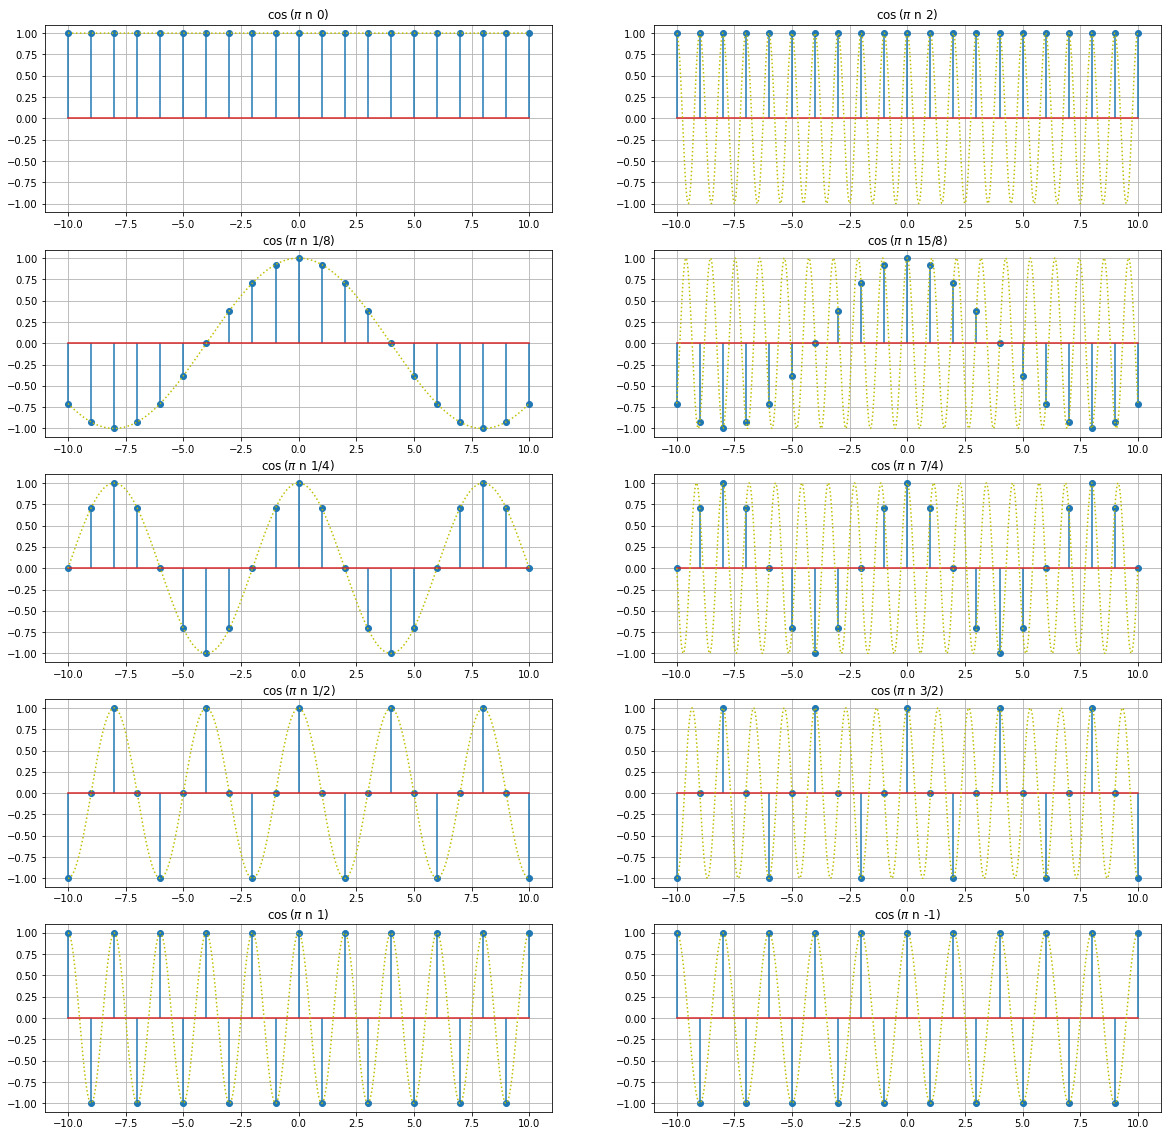

In [102]:
N = 10
n = np.linspace(-N, N, 2 * N + 1)
t = np.linspace(-N, N, 200 * N + 1)
# rs = [0, 2, 1 / 8, 15 / 8, 1 / 4, 7 / 4, 1 / 2, 3 / 2, 1, -1]
rs = ['0', '2', '1/8', '15/8', '1/4', '7/4', '1/2', '3/2', '1', '-1']
fig = plt.figure(figsize=(20, 20))
for k, rs in enumerate(rs):
    r = eval(rs)
    z = np.cos(n * np.pi * r)
    zt = np.cos(t * np.pi * r)
    plt.subplot(5, 2, k + 1)
    plt.stem(n, z)
    plt.plot(t, zt, ':y')
    plt.title('$\cos$($\pi$ n ' + str(rs) + ')')
    plt.ylim(-1.1, 1.1)
    plt.grid()
#     print(k)
#     plt.show()

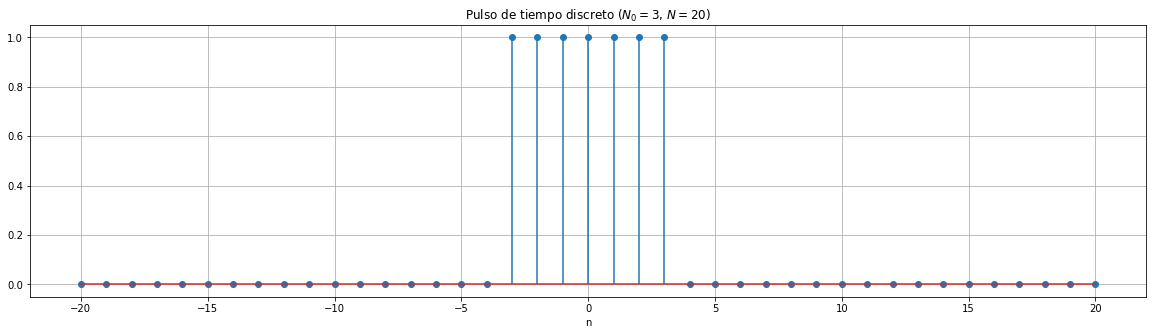

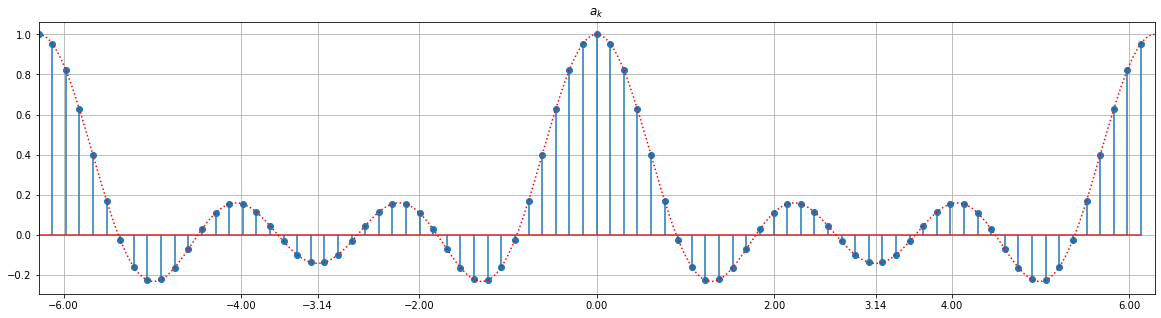

In [198]:
# =============================================================================
# Onda cuadrada de ancho t_0 y período T
# =============================================================================
N = 20
N0 = 3
NN = 2 * N + 1

n = np.linspace(-N, N, NN)
x = np.zeros(np.size(n))
x[N - N0:N - N0 + 2 * N0 + 1] = 1

fig = plt.figure(figsize=(20, 5))
plt.stem(n, x)
plt.title('Pulso de tiempo discreto ($N_0=%d$, $N=%d$)' % (N0, N))
plt.xlabel('n')
plt.grid()

theta_0 = 2 * np.pi / NN
theta_k = np.arange(-NN, NN) * theta_0
theta = np.linspace(-2 * np.pi, 2 * np.pi, 10 * NN)
X = np.sin(theta * (N0 + 1 / 2)) / np.sin(theta / 2) / (2 * N0 + 1)
ak = np.sin(theta_k * (N0 + 1 / 2)) / np.sin(theta_k / 2) / (2 * N0 + 1)
ak[0] = 1
ak[NN] = 1
fig = plt.figure(figsize=(20, 5))
plt.stem(theta_k, ak)
plt.plot(theta, X, 'r:')
plt.xticks(list(plt.xticks()[0]) + [-np.pi, np.pi])
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.title('$a_k$')
plt.grid()
plt.show()

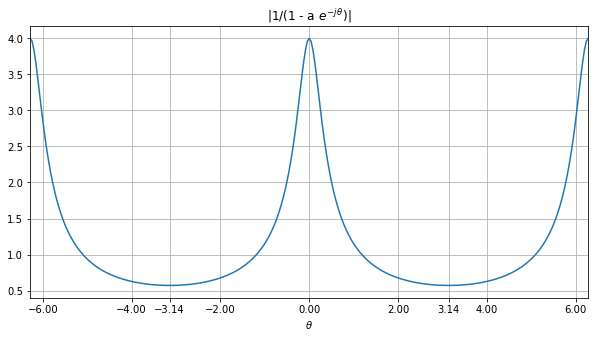

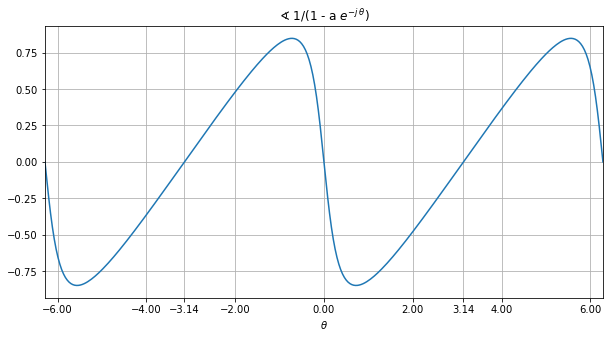

In [212]:
w = np.linspace(-2 * np.pi, 2 * np.pi, 301)
a = 0.75
N = 40
z = 1 / (1 - a * np.exp(-1.j * w))

fig = plt.figure()
plt.plot(w, np.abs(z))
plt.xticks(list(plt.xticks()[0]) + [-np.pi, np.pi])
# ax = fig.axes
# labels = [item.get_text() for item in ax[0].get_xticklabels()]
# print(labels)
# labels[1] = 'Testing'
# ax[0].set_xticklabels(labels)
plt.xlabel('$\\theta$')
plt.title('|1/(1 - a $e^{-j\,\\theta}$)|')
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.grid()
plt.show()

# plt.subplot(2, 1, 2)
fig = plt.figure()
plt.plot(w, np.angle(z))
plt.xticks(list(plt.xticks()[0]) + [-np.pi, np.pi])
# ax = fig.add_subplot(111)
plt.title('$\\sphericalangle$ 1/(1 - a $e^{-j\,\\theta}$)')
plt.xlim(-2 * np.pi, 2 * np.pi)
plt.xlabel('$\\theta$')
plt.grid()
plt.show()

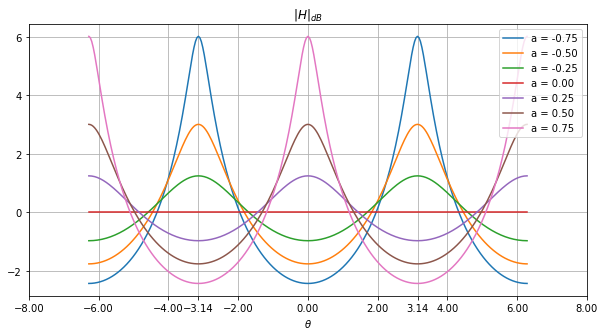

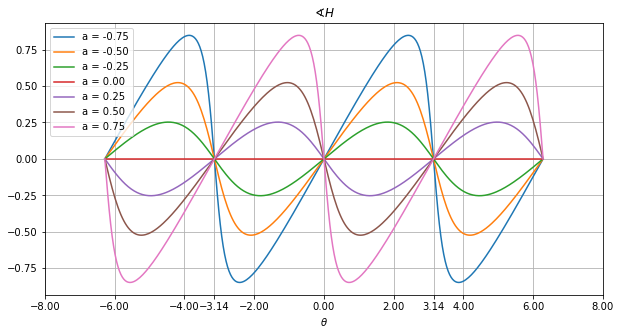

In [242]:
theta = np.linspace(-2 * np.pi, 2 * np.pi, 301)

for a in [-.75, -.5, -.25, 0, .25, .5, .75]:
    H = (1) / (1 - a * np.exp(-1.j * theta))
    plt.figure(0)
    plt.plot(theta, 10*np.log10(np.abs(H)), label=('a = %.2f' % a))
    plt.figure(1)
    plt.plot(theta, (np.angle(H)), label=('a = %.2f' % a))

plt.figure(0)
plt.xticks(list(plt.xticks()[0]) + [-np.pi, np.pi])
plt.xlabel(r'$\theta$')
plt.title(r'$|H|_{dB}$')
plt.legend()
plt.grid()
# plt.show()

plt.figure(1)
plt.xticks(list(plt.xticks()[0]) + [-np.pi, np.pi])
plt.xlabel(r'$\theta$')
plt.title(r'$\sphericalangle H$')
plt.legend()
plt.grid()
plt.show()

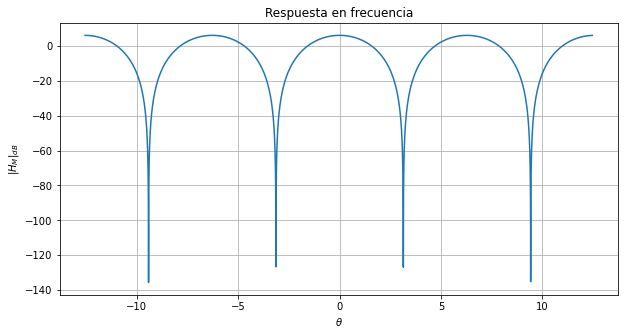

In [16]:
w = np.linspace(-4 * np.pi + .01, 4 * np.pi - 0.1, 7231)

a = 1
H = a * (1 + np.cos(w))

plt.plot(w, 20 * np.log10(np.abs(H)))
plt.title('Respuesta en frecuencia')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$|H_M|_{dB}$')
plt.grid()
plt.show()

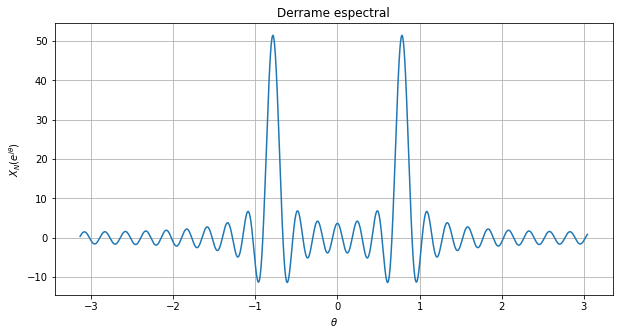

In [17]:
w = np.linspace(-np.pi + .01, np.pi - 0.1, 7231)

N = 50
thetac = np.pi / 4
dospi = 2 * np.pi
W = np.sin(N / 2 * (w + thetac)) / np.sin(1 / 2 * (w + thetac)) + np.sin(
    N / 2 * (w - thetac)) / np.sin(1 / 2 * (w - thetac))
#W=W+np.sin(N/2*(w+thetac+dospi))/np.sin(1/2*(w+thetac+dospi))+np.sin(N/2*(w-thetac+dospi))/np.sin(1/2*(w-thetac+dospi))
#W=W+np.sin(N/2*(w+thetac-dospi))/np.sin(1/2*(w+thetac-dospi))+np.sin(N/2*(w-thetac-dospi))/np.sin(1/2*(w-thetac-dospi))

plt.plot(w, W)
plt.title('Derrame espectral')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$X_N(e^{j\theta})$')
plt.grid()
plt.show()

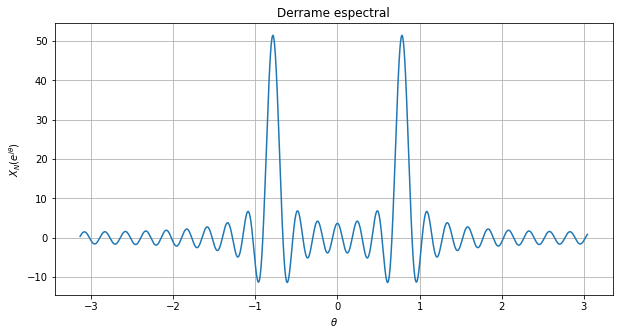

In [18]:
w = np.linspace(-np.pi + .01, np.pi - 0.1, 7231)

plt.plot(w, W)
plt.title('Derrame espectral')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$X_N(e^{j\theta})$')
plt.grid()
plt.show()